In [1]:
import pandas as pd
import geopandas as gpd
from shapely import wkt, wkb
import shapely
import numpy as np
import osmnx as ox
import networkx as nx

In [2]:
dl_gdf=ox.geocode_to_gdf("Delhi, DL, India")

<Axes: >

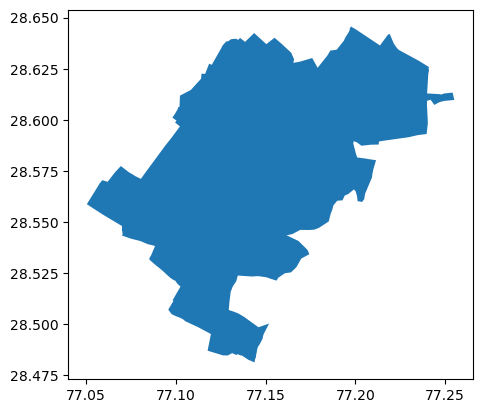

In [3]:
dl_gdf.plot()

In [5]:
M = ox.graph.graph_from_place("Delhi, DL, India", network_type="drive", retain_all=True)

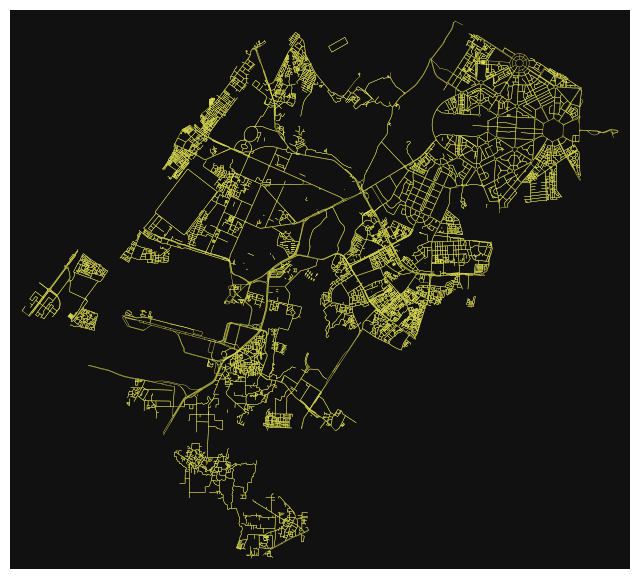

In [9]:
fig, ax = ox.plot.plot_graph(M, node_size=0, edge_color="#FFFF5D", edge_linewidth=0.25)

In [12]:
street_nx=nx.to_pandas_edgelist(M)
street_nx

,source,target,ref,access,area,reversed,junction,osmid,width,geometry,oneway,highway,lanes,bridge,name,service,length,tunnel,maxspeed
0,58056528,301037382,NaN,NaN,NaN,False,NaN,590609974,NaN,NaN,True,primary,NaN,NaN,Nelson Mandela Marg,NaN,31.509355,NaN,NaN
1,58056528,7612915570,NaN,NaN,NaN,False,NaN,"[558065085, 558065079]",NaN,"LINESTRING (77.1710004 28.5593895, 77.1701847 ...",True,secondary,NaN,NaN,Palam Marg,NaN,325.637170,NaN,NaN
2,60890393,6436786516,NaN,NaN,NaN,True,NaN,1121966690,NaN,NaN,False,residential,NaN,NaN,NaN,NaN,17.640539,NaN,NaN
3,60890393,6110396131,NaN,NaN,NaN,False,NaN,25744598,NaN,"LINESTRING (77.1749531 28.580619, 77.1750377 2...",True,tertiary,2,NaN,NaN,NaN,156.010558,NaN,NaN
4,60890393,280740684,NaN,NaN,NaN,False,NaN,"[583917363, 1312224221, 44317159]",NaN,"LINESTRING (77.1749531 28.580619, 77.1751707 2...",True,primary,NaN,yes,Moti Bagh Flyover,NaN,621.717997,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26184,12629827654,12629827655,NaN,NaN,NaN,True,NaN,1363977042,NaN,"LINESTRING (77.1884399 28.56285, 77.1885179 28...",False,residential,NaN,NaN,NaN,NaN,12.931152,NaN,NaN
26185,12629827655,4233127227,NaN,NaN,NaN,False,NaN,567831194,NaN,"LINESTRING (77.1885713 28.5628359, 77.1886444 ...",True,secondary,2,NaN,Africa Avenue,NaN,141.403914,NaN,NaN
26186,12629827655,12629827654,NaN,NaN,NaN,False,NaN,1363977042,NaN,"LINESTRING (77.1885713 28.5628359, 77.1885179 ...",False,residential,NaN,NaN,NaN,NaN,12.931152,NaN,NaN
26187,12632829123,9869585100,NaN,NaN,NaN,False,NaN,1076248781,NaN,NaN,False,residential,NaN,NaN,NaN,NaN,47.074314,NaN,NaN


In [14]:
street_nx['geometry'].isna().sum()

13179

In [15]:
street_nx_cleaned = street_nx.dropna(subset=['geometry'])

In [16]:
street_nx_cleaned=gpd.GeoDataFrame(street_nx_cleaned, geometry=street_nx_cleaned['geometry'])

In [17]:
linestrings=street_nx_cleaned.geometry
collection = shapely.GeometryCollection(linestrings.array)
noded = shapely.node(collection)
polygonized=shapely.polygonize(noded.geoms)
polygons=gpd.GeoSeries(polygonized.geoms)

In [20]:
poly_buff = polygons.set_crs(4326).to_crs(3873).buffer(-30).to_crs(4326).reset_index()

In [21]:
poly_buff['area'] = poly_buff.set_crs(4326).to_crs(3873).area


In [22]:
poly_shp = poly_buff[poly_buff['area'] >= 5000][[0, 'area']]
poly_shp.columns = ['geometry', 'area']
poly_shp.set_geometry('geometry', inplace=True)

In [23]:
tessellation = polygons.reset_index()
tessellation.columns = ['eID', 'geometry']
tessellation


,eID,geometry
0,0,"POLYGON ((77.16951 28.56076, 77.16933 28.56093..."
1,1,"POLYGON ((77.16879 28.56157, 77.16893 28.5614,..."
2,2,"POLYGON ((77.17495 28.58062, 77.17504 28.58057..."
3,3,"POLYGON ((77.19317 28.56924, 77.19255 28.56915..."
4,4,"POLYGON ((77.18033 28.60184, 77.17537 28.59922..."
...,...,...
821,821,"POLYGON ((77.24038 28.6217, 77.24038 28.6216, ..."
822,822,"POLYGON ((77.20029 28.58159, 77.19989 28.58162..."
823,823,"POLYGON ((77.09522 28.57604, 77.09495 28.57607..."
824,824,"POLYGON ((77.10712 28.53313, 77.10778 28.53347..."
